**Introducción**

El análisis de datos meteorológicos desempeña un papel fundamental en la comprensión y predicción de las condiciones climáticas en diferentes regiones geográficas. En el presente trabajo, nos enfocamos en un conjunto de datos que comprende tres variables meteorológicas esenciales: la temperatura, la presión atmosférica y la humedad relativa. Utilizamos estas variables para llevar a cabo un análisis completo que incluye la obtención, visualización, limpieza y clasificación de los datos. Además, nuestra principal tarea es construir un modelo de aprendizaje automático capaz de determinar a cuál de los dos municipios, Udea Caucasia y Udea Yarumal, corresponde una observación meteorológica en función de la temperatura.

El objetivo de este proyecto es múltiple. En primer lugar, buscamos comprender y describir la variabilidad de las condiciones meteorológicas en las áreas geográficas de Udea Caucasia y Udea Yarumal. En segundo lugar, realizamos una exhaustiva limpieza y preprocesamiento de los datos para garantizar su calidad y confiabilidad. Posteriormente, empleamos técnicas de aprendizaje automático para clasificar las observaciones meteorológicas en los municipios mencionados basándonos únicamente en la temperatura registrada. Esta clasificación es de gran importancia para una amplia gama de aplicaciones, como la toma de decisiones agrícolas, la gestión de recursos hídricos y la planificación de actividades al aire libre.

A lo largo de este trabajo, se presentarán visualizaciones detalladas que ayudarán a comprender la relación entre las variables meteorológicas y la clasificación de los municipios. Además, se describirán los pasos clave en la metodología de análisis, incluyendo la recopilación y exploración inicial de los datos, la limpieza y transformación de datos, y la implementación de algoritmos de clasificación. La precisión del modelo de aprendizaje automático será evaluada y se discutirán las implicaciones y posibles aplicaciones de esta clasificación meteorológica.


In [15]:
# Importa la biblioteca pandas para la manipulación y análisis de datos
import pandas as pd

# Importa matplotlib.pyplot para la creación de gráficos y visualizaciones
import matplotlib.pyplot as plt

# Importa seaborn para crear gráficos más atractivos y efectivos
import seaborn as sns

# Importa numpy para operaciones numéricas y matriciales eficientes
import numpy as np

import plotly.express as px

# Importa scipy.stats.norm para trabajar con distribuciones normales
from scipy.stats import norm

# Importa StandardScaler de sklearn.preprocessing para escalar características numéricas
from sklearn.preprocessing import StandardScaler

# Importa scipy.stats para realizar cálculos estadísticos adicionales si es necesario
from scipy import stats

# Importa la biblioteca de advertencias para desactivar temporalmente los avisos
import warnings
warnings.filterwarnings('ignore')

# Configura la visualización de gráficos en línea en cuadernos de Jupyter
%matplotlib inline

# Importa train_test_split de scikit-learn para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Importa LogisticRegression de scikit-learn para construir un modelo de regresión logística
from sklearn.linear_model import LogisticRegression

# Importa métricas como accuracy_score y classification_report de scikit-learn para evaluar el modelo
from sklearn.metrics import accuracy_score, classification_report


**Manipulación y Limpieza de Datos en Ciencia de Datos**

La manipulación y limpieza de datos son procesos críticos en el campo de la ciencia de datos. Estas etapas son fundamentales para garantizar que los datos sean confiables, coherentes y estén listos para el análisis. En esta sección, exploraremos más a fondo la importancia de estas operaciones y cómo se aplican en la práctica.

**Importancia de la Manipulación y Limpieza de Datos**

La calidad de los datos es esencial para cualquier análisis de datos o proyecto de ciencia de datos. Los datos incompletos, incoherentes o erróneos pueden llevar a conclusiones incorrectas y decisiones erróneas. Aquí hay algunas razones por las que la manipulación y limpieza de datos son críticas:
* Confianza en los Resultados: Un análisis se basa en datos confiables. La manipulación y limpieza adecuadas garantizan que los datos sean precisos y verificables.

* Coherencia: Los datos deben seguir un formato coherente para su análisis. Esto incluye la estandarización de unidades, formatos de fecha y hora, y la codificación adecuada.

* Manejo de Datos Faltantes: En la mayoría de los conjuntos de datos, es común que haya valores faltantes. Estos deben ser tratados de manera adecuada, ya sea llenándolos con valores estimados o eliminando registros incompletos.

* Eliminación de Datos Duplicados: Los duplicados pueden distorsionar los análisis y deben ser eliminados para obtener resultados precisos.

* Transformación de Datos: A menudo, es necesario realizar transformaciones en los datos, como la conversión de variables categóricas en numéricas o la normalización de datos para que los algoritmos de aprendizaje automático funcionen de manera efectiva.

**Ejemplo de Manipulación y Limpieza de Datos**

Un ejemplo común de manipulación y limpieza de datos se puede encontrar en la carga de datos desde un archivo CSV a un DataFrame en Python utilizando la biblioteca Pandas:

In [16]:

df = pd.read_csv('caucasia_yarumal_temperatura_presion.csv')
df = df.drop(columns=['Unnamed: 0'])
df


,fecha,nombre_completo,estado,temperatura,presion,humedad_relativa
0,2023-09-29 00:00:00,UdeA Yarumal,Habilitada,15.44444,778.35523,87
1,2023-09-29 00:01:00,UdeA Yarumal,Habilitada,15.50000,778.35523,87
2,2023-09-29 00:02:00,UdeA Yarumal,Habilitada,15.50000,778.35523,87
3,2023-09-29 00:03:00,UdeA Yarumal,Habilitada,15.50000,778.38909,87
4,2023-09-29 00:04:00,UdeA Yarumal,Habilitada,15.55556,778.38909,87
...,...,...,...,...,...,...
73680,2023-10-28 21:45:00,UdeA Yarumal,Habilitada,15.27778,778.79546,77
73681,2023-10-28 21:46:00,UdeA Yarumal,Habilitada,15.27778,778.79546,77
73682,2023-10-28 21:47:00,UdeA Yarumal,Habilitada,15.27778,778.86319,77
73683,2023-10-28 21:48:00,UdeA Yarumal,Habilitada,15.33333,778.96478,77


En el anterior dataframe se puede visualizar 6 columnas donde cada una ejemplifica el contenido de la misma, y 73688 filas de los cuales podemos detallar adecuadamente el contenido del dataframe

In [17]:
# Echo un vistazo las columnas:
df.columns

Index(['fecha', 'nombre_completo', 'estado', 'temperatura', 'presion',
       'humedad_relativa'],
      dtype='object')

In [18]:
# Forma del dataframe 
df.shape

(73685, 6)

In [19]:
#Verificamos que no hayan datos nullos 
df.isna().sum()

fecha               0
nombre_completo     0
estado              0
temperatura         0
presion             0
humedad_relativa    0
dtype: int64

In [20]:
# Sacamos el porcentaje de datos nulos
df.isna().sum() / df.shape[0]

fecha               0.0
nombre_completo     0.0
estado              0.0
temperatura         0.0
presion             0.0
humedad_relativa    0.0
dtype: float64

In [21]:
df["nombre_completo"].value_counts()


nombre_completo
UdeA Yarumal     42504
UdeA Caucasia    31181
Name: count, dtype: int64

In [24]:
# Vamos a convertir 'fecha' a un formato de fecha
df['fecha'] = pd.to_datetime(df['fecha'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73685 entries, 0 to 73684
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   fecha             73685 non-null  datetime64[ns]
 1   nombre_completo   73685 non-null  object        
 2   estado            73685 non-null  object        
 3   temperatura       73685 non-null  float64       
 4   presion           73685 non-null  float64       
 5   humedad_relativa  73685 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 3.4+ MB


In [27]:
# Supongamos que tienes un DataFrame llamado 'df' con las columnas 'fecha' y 'temperatura'
fig = px.line(df, x='fecha', y='temperatura', title='Serie de Tiempo de Temperatura')
fig.update_xaxes(title_text='Fecha')
fig.update_yaxes(title_text='Temperatura (°C)')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73685 entries, 0 to 73684
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fecha             73685 non-null  object 
 1   nombre_completo   73685 non-null  object 
 2   estado            73685 non-null  object 
 3   temperatura       73685 non-null  float64
 4   presion           73685 non-null  float64
 5   humedad_relativa  73685 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 3.4+ MB


In [ ]:
df = df.drop(['estado', 'fecha'], axis=1)
df

,nombre_completo,temperatura,presion,humedad_relativa
0,UdeA Yarumal,15.44444,778.35523,87
1,UdeA Yarumal,15.50000,778.35523,87
2,UdeA Yarumal,15.50000,778.35523,87
3,UdeA Yarumal,15.50000,778.38909,87
4,UdeA Yarumal,15.55556,778.38909,87
...,...,...,...,...
73680,UdeA Yarumal,15.27778,778.79546,77
73681,UdeA Yarumal,15.27778,778.79546,77
73682,UdeA Yarumal,15.27778,778.86319,77
73683,UdeA Yarumal,15.33333,778.96478,77


In [ ]:
df[df["nombre_completo"] == "UdeA Caucasia"]

,nombre_completo,temperatura,presion,humedad_relativa
480,UdeA Caucasia,27.72222,1009.55029,86
481,UdeA Caucasia,27.72222,1009.55029,86
482,UdeA Caucasia,27.72222,1009.41483,86
483,UdeA Caucasia,27.66667,1009.48256,87
484,UdeA Caucasia,27.72222,1009.48256,87
...,...,...,...,...
73030,UdeA Caucasia,30.05556,1010.87098,76
73031,UdeA Caucasia,30.05556,1010.90484,75
73032,UdeA Caucasia,30.05556,1010.90484,76
73033,UdeA Caucasia,30.05556,1010.83712,76


<h1>1. Problema</h1>
<p>Para entender realmente el conjunto de datos, voy a estudiar el significado y la relevancia de cada variable con respecto al problema. Intentaré responder a diversas cuestiones sobre ellas, como:</p>
<ol>
  <li>La relevancia de la variable en la zona que se desea estudiar.</li>
  <li>La importancia de la variable.</li>
  <li>Solapamiento con otras variables.</li>
</ol>

<h1>2. Análisis univariable: 'temperatura'</h2>
<p>La variable 'temperatura' es la variable objetivo de este conjunto de datos. En pasos posteriores a este análisis exploratorio de datos se realizaría una predicción del valor de esta variable, por lo que voy a estudiarla con mayor detenimiento:</p>

In [ ]:
df['temperatura'].unique()

array([15.44444, 15.5    , 15.55556, 15.38889, 15.33333, 15.27778,
       15.22222, 15.16667, 15.11111, 15.05556, 15.     , 14.94444,
       14.88889, 14.83333, 14.77778, 14.72222, 14.66667, 14.61111,
       14.55556, 14.5    , 14.44444, 14.38889, 14.33333, 14.27778,
       14.22222, 15.61111, 15.66667, 15.72222, 15.77778, 15.83333,
       15.88889, 15.94444, 16.05556, 16.11111, 16.16667, 16.22222,
       16.27778, 27.72222, 27.66667, 27.77778, 27.83333, 27.88889,
       27.94444, 16.33333, 16.38889, 28.     , 28.05556, 28.11111,
       16.     , 28.16667, 28.22222, 28.27778, 28.33333, 28.38889,
       28.44444, 28.5    , 28.55556, 28.66667, 28.77778, 28.83333,
       28.94444, 29.     , 29.11111, 29.16667, 29.22222, 29.27778,
       29.33333, 29.38889, 29.5    , 29.55556, 29.66667, 29.77778,
       29.83333, 29.88889, 29.94444, 30.     , 30.05556, 30.11111,
       30.16667, 16.44444, 16.55556, 16.61111, 16.66667, 16.77778,
       16.83333, 16.88889, 17.     , 17.05556, 30.22222, 30.27

In [ ]:
# Resumen de estadística descriptiva:

df['temperatura'].describe()

count    73685.000000
mean        21.472707
std          6.255110
min         12.944440
25%         15.611110
50%         19.333330
75%         26.611110
max         35.166670
Name: temperatura, dtype: float64

In [ ]:
df[['temperatura','humedad_relativa']]

,temperatura,humedad_relativa
0,15.44444,87
1,15.50000,87
2,15.50000,87
3,15.50000,87
4,15.55556,87
...,...,...
73680,15.27778,77
73681,15.27778,77
73682,15.27778,77
73683,15.33333,77


In [ ]:
#Creamos el data frame para caucasia y visualizar sus comportamientos
df_udea_caucasia = df[df['nombre_completo']=='UdeA Caucasia']
df_udea_caucasia

,nombre_completo,temperatura,presion,humedad_relativa
480,UdeA Caucasia,27.72222,1009.55029,86
481,UdeA Caucasia,27.72222,1009.55029,86
482,UdeA Caucasia,27.72222,1009.41483,86
483,UdeA Caucasia,27.66667,1009.48256,87
484,UdeA Caucasia,27.72222,1009.48256,87
...,...,...,...,...
73030,UdeA Caucasia,30.05556,1010.87098,76
73031,UdeA Caucasia,30.05556,1010.90484,75
73032,UdeA Caucasia,30.05556,1010.90484,76
73033,UdeA Caucasia,30.05556,1010.83712,76


In [ ]:
#Creamos el data frame para Yarumal y visualizar sus comportamientos
df_udea_yarumal = df[df['nombre_completo']=='UdeA Yarumal']
df_udea_yarumal

,nombre_completo,temperatura,presion,humedad_relativa
0,UdeA Yarumal,15.44444,778.35523,87
1,UdeA Yarumal,15.50000,778.35523,87
2,UdeA Yarumal,15.50000,778.35523,87
3,UdeA Yarumal,15.50000,778.38909,87
4,UdeA Yarumal,15.55556,778.38909,87
...,...,...,...,...
73680,UdeA Yarumal,15.27778,778.79546,77
73681,UdeA Yarumal,15.27778,778.79546,77
73682,UdeA Yarumal,15.27778,778.86319,77
73683,UdeA Yarumal,15.33333,778.96478,77


In [ ]:
df['nombre_completo'].unique()

array(['UdeA Yarumal', 'UdeA Caucasia'], dtype=object)

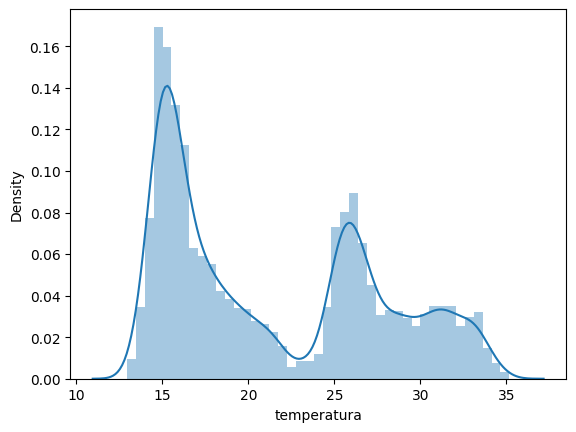

In [ ]:
# Histograma:

sns.distplot(df['temperatura']);

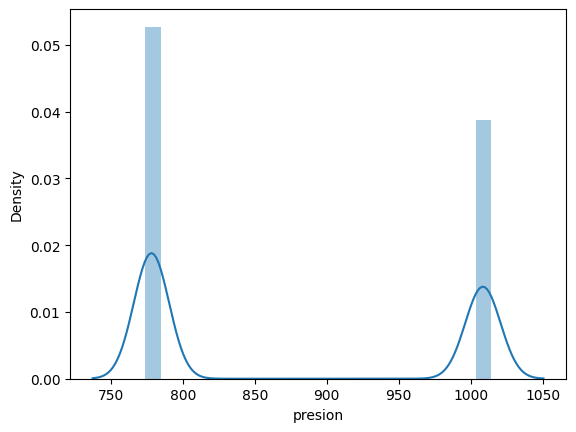

In [ ]:
sns.distplot(df['presion']);

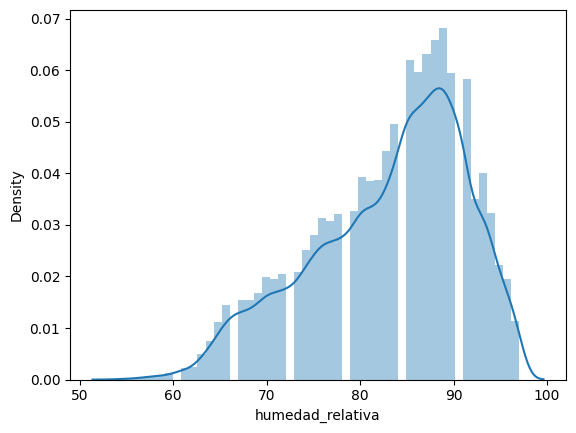

In [ ]:
sns.distplot(df['humedad_relativa']);

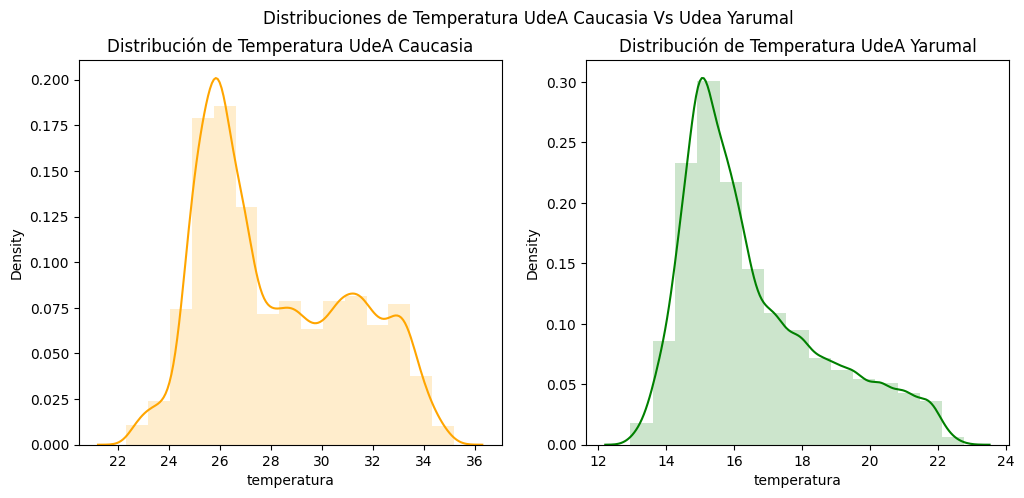

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title('Distribución de Temperatura UdeA Caucasia')
sns.distplot(df_udea_caucasia['temperatura'],color="orange",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
plt.title('Distribución de Temperatura UdeA Yarumal')
sns.distplot(df_udea_yarumal['temperatura'],color="green",bins=15,hist_kws={'alpha':0.2})
plt.suptitle('Distribuciones de Temperatura UdeA Caucasia Vs Udea Yarumal')
plt.show()

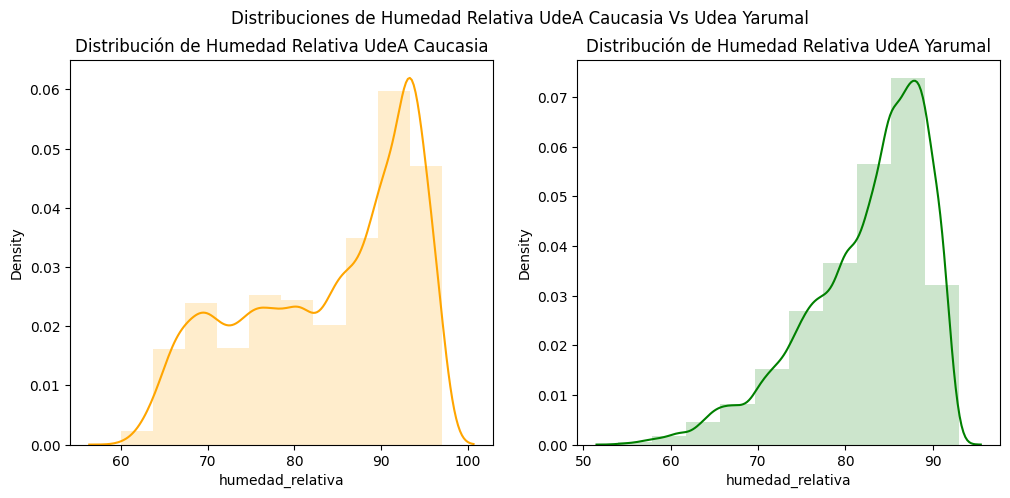

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title('Distribución de Humedad Relativa UdeA Caucasia')
sns.distplot(df_udea_caucasia['humedad_relativa'],color="orange",bins=10,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
plt.title('Distribución de Humedad Relativa UdeA Yarumal')
sns.distplot(df_udea_yarumal['humedad_relativa'],color="green",bins=10,hist_kws={'alpha':0.2})
plt.suptitle('Distribuciones de Humedad Relativa UdeA Caucasia Vs Udea Yarumal')
plt.show()

A simple vista se pueden apreciar:
- Asimetrico hacia la derecha
- Una desviación con respecto a la distribución normal.
- Datos multimodales

<Axes: xlabel='count', ylabel='nombre_completo'>

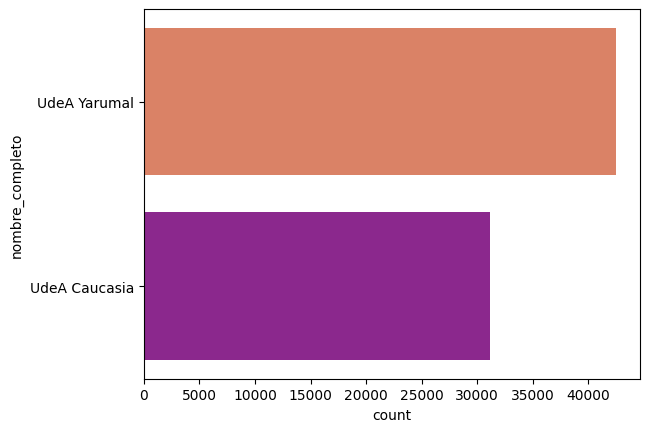

In [ ]:
sns.countplot(y='nombre_completo',data=df, palette="plasma_r")

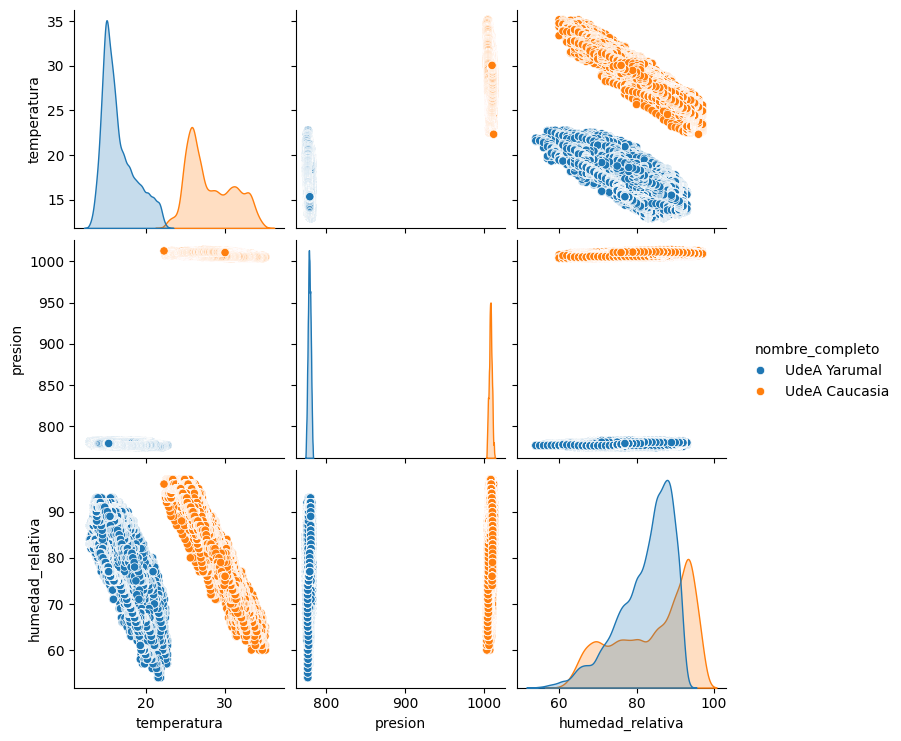

In [ ]:
sns.pairplot(df, hue = 'nombre_completo')
plt.savefig('pairplot.png')
plt.show()

<Axes: xlabel='temperatura', ylabel='nombre_completo'>

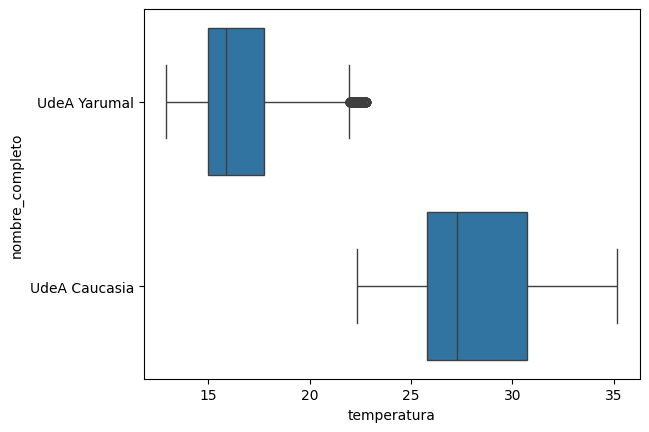

In [ ]:
sns.boxplot(y='nombre_completo',x='temperatura',data=df)

In [ ]:
# Calcular el IQR
Q1 = df_udea_yarumal['temperatura'].quantile(0.25)
Q3 = df_udea_yarumal['temperatura'].quantile(0.75)
IQR = Q3 - Q1

# Identificar valores atípicos
outliers = df_udea_yarumal[(df_udea_yarumal['temperatura'] < (Q1 - 1.5 * IQR)) | (df_udea_yarumal['temperatura'] > (Q3 + 1.5 * IQR))]




In [ ]:
df_udea_yarumal_sin_atipicos = df_udea_yarumal.drop(outliers.index)

In [ ]:
data_total = pd.concat([df_udea_caucasia, df_udea_yarumal_sin_atipicos], ignore_index=True)
data_total

,nombre_completo,temperatura,presion,humedad_relativa
0,UdeA Caucasia,27.72222,1009.55029,86
1,UdeA Caucasia,27.72222,1009.55029,86
2,UdeA Caucasia,27.72222,1009.41483,86
3,UdeA Caucasia,27.66667,1009.48256,87
4,UdeA Caucasia,27.72222,1009.48256,87
...,...,...,...,...
73369,UdeA Yarumal,15.27778,778.79546,77
73370,UdeA Yarumal,15.27778,778.79546,77
73371,UdeA Yarumal,15.27778,778.86319,77
73372,UdeA Yarumal,15.33333,778.96478,77


<Axes: xlabel='temperatura', ylabel='nombre_completo'>

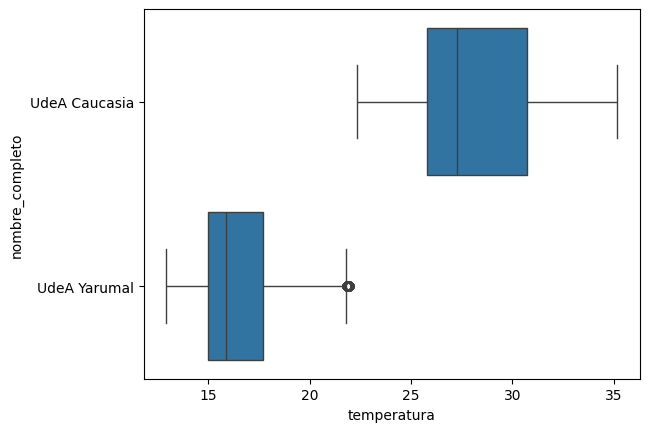

In [ ]:
sns.boxplot(y='nombre_completo',x='temperatura',data=data_total)

In [ ]:


# Supongamos que ya has cargado tu DataFrame df y tienes tu variable objetivo en 'nombre_completo'.

# Dividir los datos en características (X) y variable objetivo (y)
X = df.drop('nombre_completo', axis=1)  # Todas las columnas excepto 'nombre_completo' son características
y = df['nombre_completo']  # 'nombre_completo' es la variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba (por ejemplo, 80% entrenamiento y 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evalúa el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Exactitud del modelo: {accuracy}")
print("Reporte de clasificación:")
print(report)

Exactitud del modelo: 1.0
Reporte de clasificación:
               precision    recall  f1-score   support

UdeA Caucasia       1.00      1.00      1.00      6205
 UdeA Yarumal       1.00      1.00      1.00      8532

     accuracy                           1.00     14737
    macro avg       1.00      1.00      1.00     14737
 weighted avg       1.00      1.00      1.00     14737

